Luis Fernando Márquez Bañuelos

Luis Eduardo Jiménez del Muro

Diego Lozoya Morales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

plt.rcParams['figure.facecolor'] = 'lightgrey'
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'black'

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]

# Data

In [2]:
data = yf.download("AAPL", start="2001-01-01", end="2025-09-01")["Close"]
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2001-01-02,0.223275
2001-01-03,0.245790
2001-01-04,0.256110
2001-01-05,0.245790
2001-01-08,0.248604
...,...
2025-08-25,227.160004
2025-08-26,229.309998
2025-08-27,230.490005


# Price plot

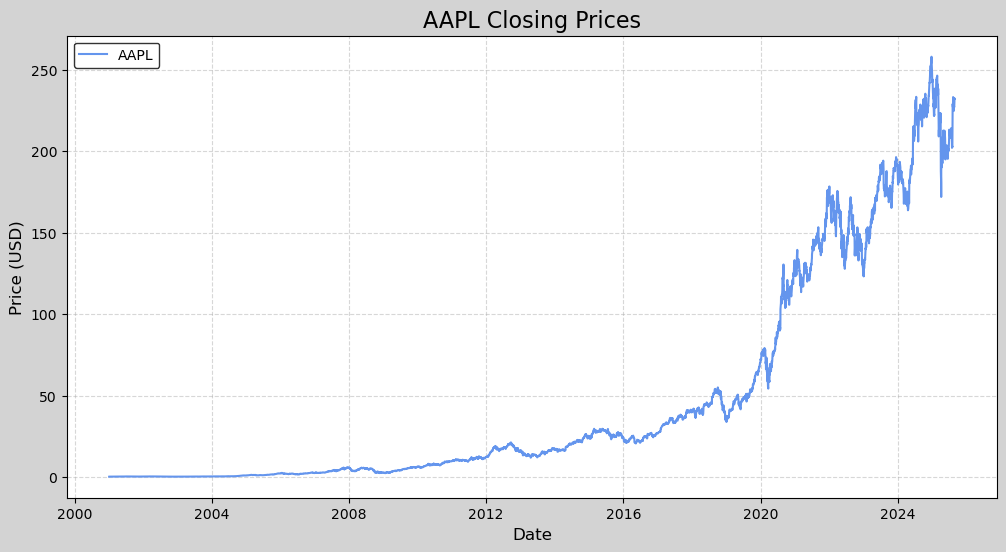

In [3]:
plt.figure()
plt.plot(data, color=colors[0], label="AAPL")
plt.title("AAPL Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

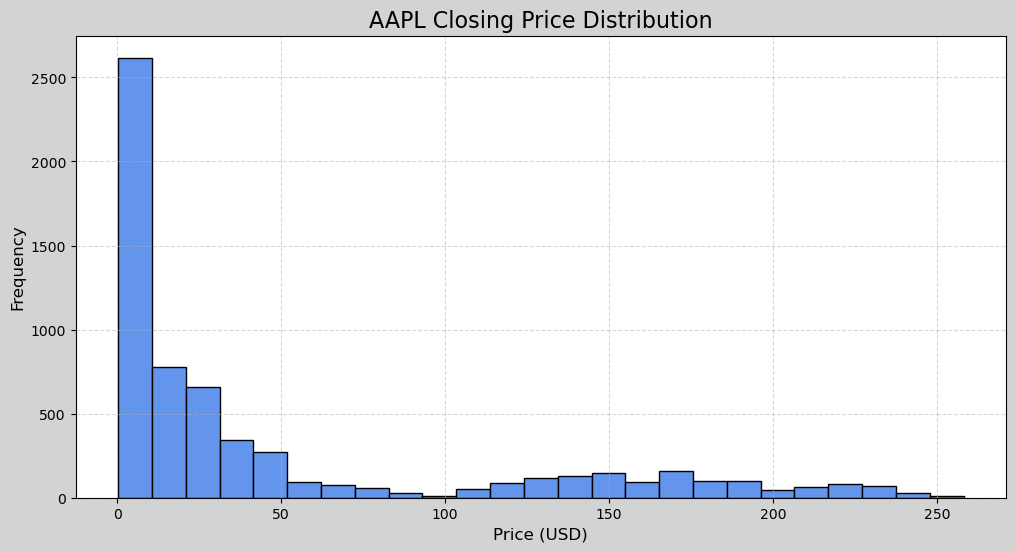

In [4]:
plt.figure()
plt.hist(data.dropna(), bins=25, color=colors[0], edgecolor='black')
plt.title("AAPL Closing Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

# Return plot

In [5]:
data["R"] = data["AAPL"].pct_change().dropna()
data["r"] = np.log(data["AAPL"]) - np.log(data["AAPL"].shift(1))

data = data.dropna()

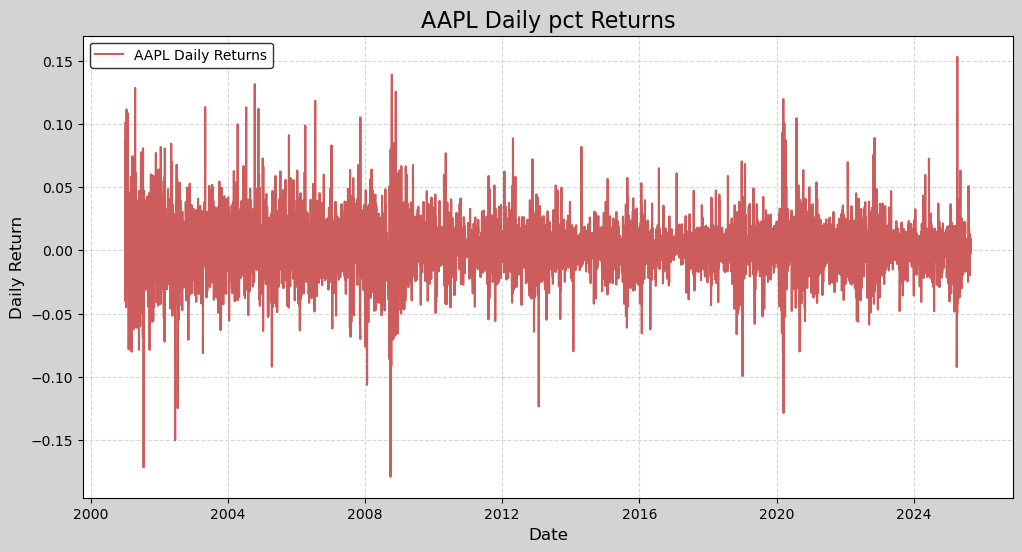

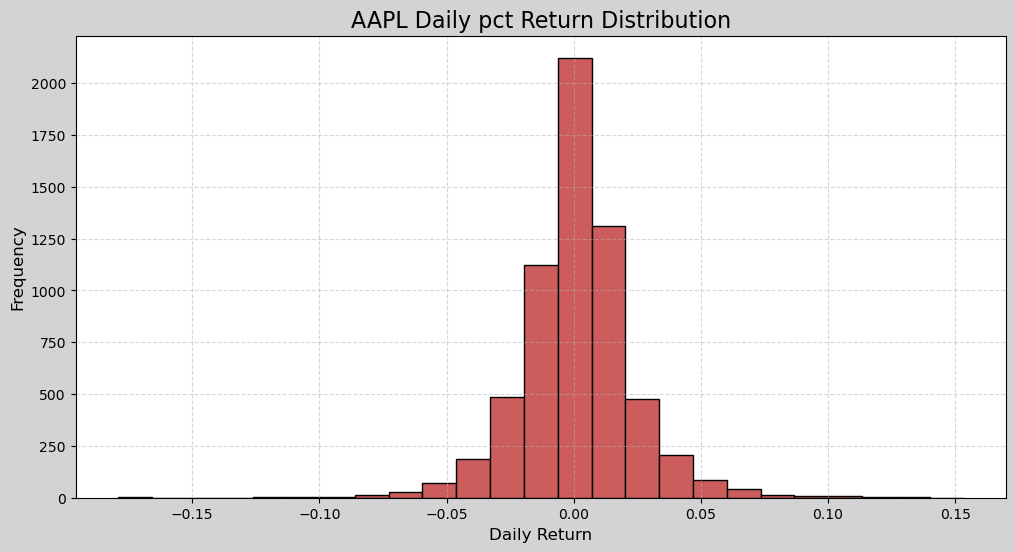

In [6]:
plt.figure()
plt.plot(data["R"], color=colors[1], label="AAPL Daily Returns")
plt.title("AAPL Daily pct Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()

plt.figure()
plt.hist(data["R"], bins=25, color=colors[1], edgecolor='black')
plt.title("AAPL Daily pct Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

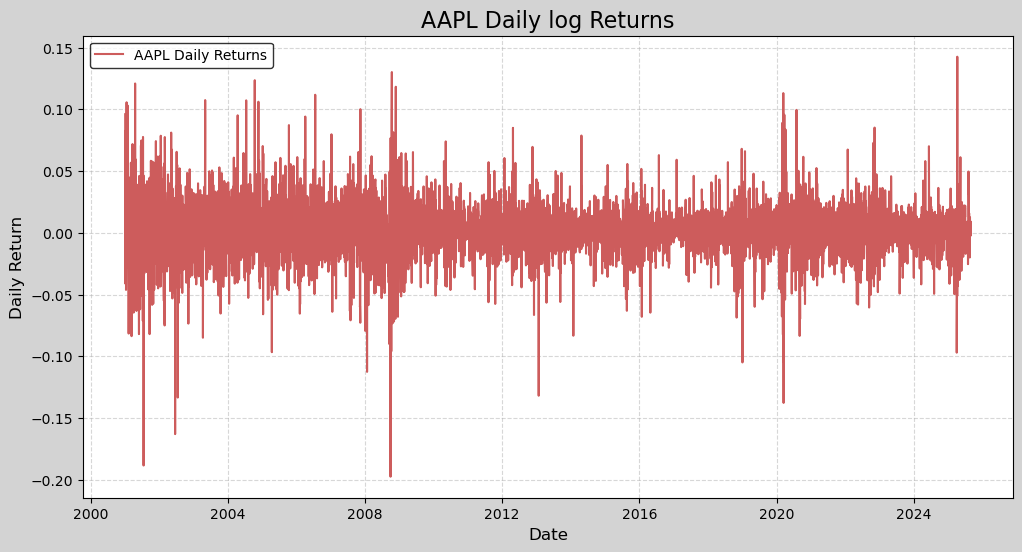

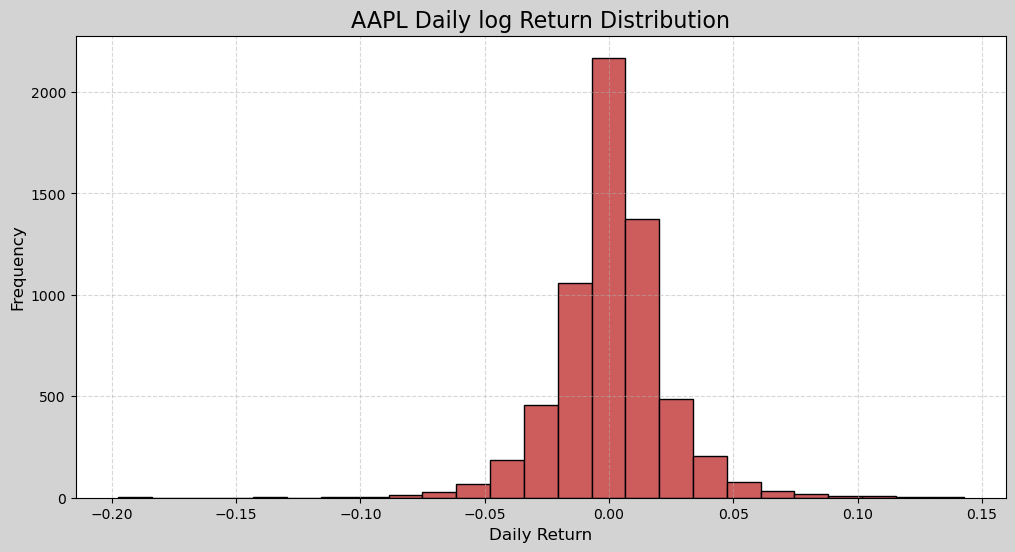

In [7]:
plt.figure()
plt.plot(data["r"], color=colors[1], label="AAPL Daily Returns")
plt.title("AAPL Daily log Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()

plt.figure()
plt.hist(data["r"], bins=25, color=colors[1], edgecolor='black')
plt.title("AAPL Daily log Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# Report

In [8]:
def dqr(data):
    
    cols = pd.DataFrame(list(data.columns.values),
                           columns=['Name'],
                           index=list(data.columns.values))
    dtyp = pd.DataFrame(data.dtypes,columns=['Type'])
    misval = pd.DataFrame(data.isnull().sum(),
                                  columns=['N/A value'])
    presval = pd.DataFrame(data.count(),
                                  columns=['Count values'])
    unival = pd.DataFrame(columns=['Unique values'])
    minval = pd.DataFrame(columns=['Min'])
    maxval = pd.DataFrame(columns=['Max'])
    mean =pd.DataFrame(data.mean(), columns=['Mean']) 
    Std =pd.DataFrame(data.std(), columns=['Std']) 
    Var =pd.DataFrame(data.var(), columns=['Var']) 
    median =pd.DataFrame(data.median(), columns=['Median']) 
    
    skewness = pd.DataFrame(data.skew(), columns=['Skewness']) 
    kurtosis = pd.DataFrame(data.kurtosis(), columns=['Kurtosis']) 

    for col in list(data.columns.values):
        unival.loc[col] = [data[col].nunique()]
        try:
            minval.loc[col] = [data[col].min()]
            maxval.loc[col] = [data[col].max()]
        except:
            pass
    
    # Juntar todas las tablas
    return cols.join(dtyp).join(misval).join(presval).join(unival).join(minval).join(maxval).join(mean).join(Std).join(Var).join(median).join(skewness).join(kurtosis)

In [ ]:
Report= dqr(data)
Report

,Name,Type,N/A value,Count values,Unique values,Min,Max,Mean,Std,Var,Median,Skewness,Kurtosis
AAPL,AAPL,float64,0,6201,5850,0.196932,258.103729,47.462848,66.114534,4371.131634,16.571108,1.488873,0.859393
R,R,float64,0,6201,6173,-0.179195,0.153288,0.001368,0.022265,0.000496,0.000954,0.121270,5.507384
r,r,float64,0,6201,6173,-0.197470,0.142617,0.001120,0.022247,0.000495,0.000954,-0.136248,5.956192


# Pruebas

In [10]:
from scipy import stats

alfa = 0.05
# Ho: son iguales
# H1: son diferentes

W, p2 = stats.levene(data["r"], data["R"])
if p2 < alfa:
     print("Rechazo Ho, las varianzas son diferentes")
else:
     print("No rechazo Ho, las varianzas son iguales")

No rechazo Ho, las varianzas son iguales


In [11]:
t, p = stats.ttest_ind(data.r, data.R, equal_var=False)

if p < alfa:
     print("Rechazo Ho, las medias son diferentes")
else:
     print("No rechazo Ho, las medias son iguales")

No rechazo Ho, las medias son iguales


In [12]:
print("LEFT: ", data.R.mean() - 0.5 * data.R.var())
print("RIGHT: ", data.r.mean())
print("diff: ", data.R.mean() - 0.5 * data.R.var() - data.r.mean())

LEFT:  0.0011205555438049092
RIGHT:  0.0011202537270030763
diff:  3.018168018328448e-07


In [13]:
k3, p3 = stats.normaltest(data.r)
if p3 < alfa:
     print("Rechazo Ho, no son normales")
else:
     print("No rechazo Ho, son normales")

Rechazo Ho, no son normales


In [14]:
k4, p4 = stats.normaltest(data.R)
if p4 < alfa:
     print("Rechazo Ho, no son normales")
else:
     print("No rechazo Ho, son normales")

Rechazo Ho, no son normales


# Fitter

2025-09-04 21:39:14.809 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.0)
2025-09-04 21:39:14.829 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=0.0)
2025-09-04 21:39:14.874 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=0.0)
2025-09-04 21:39:14.882 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=0.0)
2025-09-04 21:39:14.905 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted chi2 distribution with error=0.0)
2025-09-04 21:39:14.908 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=0.0)
2025-09-04 21:39:14.914 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.0)
2025-09-04 21:39:14.937 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.0)
20

{'norm': {'loc': 196593.614, 'scale': 98549.90341700494}}
r
{'cauchy': {'loc': 0.0010166331540007276, 'scale': 0.010125474331099749}}


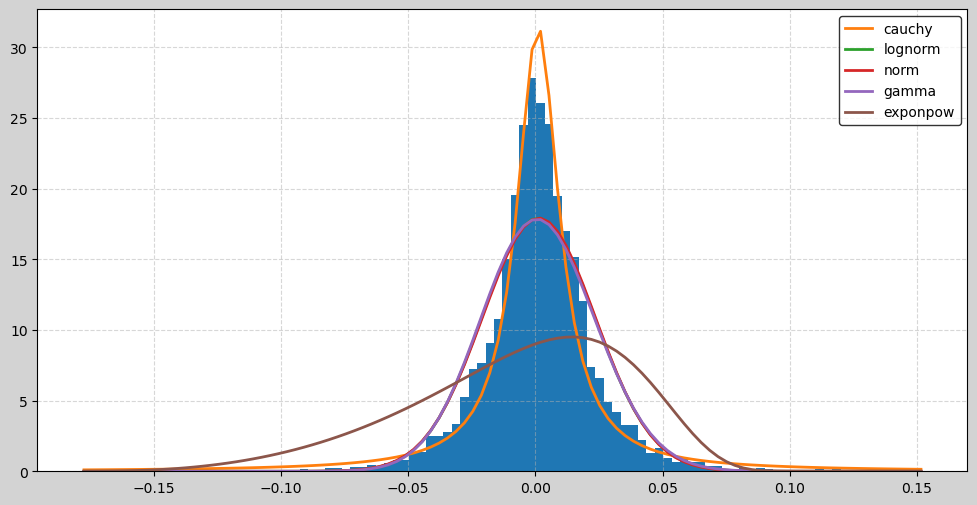

In [15]:
from Fitter import Fitter, get_common_distributions, get_distributions

dist= get_common_distributions() #get_distributions()#get_common_distributions() 
f = Fitter(data.R,distributions=dist)
f.fit()
f.summary()
print ("r")
print(f.get_best())

2025-09-04 21:39:15.588 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=128.275568)
2025-09-04 21:39:15.591 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=4362.635099)
2025-09-04 21:39:15.605 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted powerlaw distribution with error=3809.412192)
2025-09-04 21:39:15.608 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=388.388682)
2025-09-04 21:39:15.609 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted rayleigh distribution with error=3506.36623)
2025-09-04 21:39:15.611 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=3878.211328)
2025-09-04 21:39:15.657 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=399.181124)
2025-09-04 21:39:15.663 | INFO     | fitter.fitter:_fit_single_distribut

r
{'cauchy': {'loc': 0.0010654577875829868, 'scale': 0.010115293723861139}}


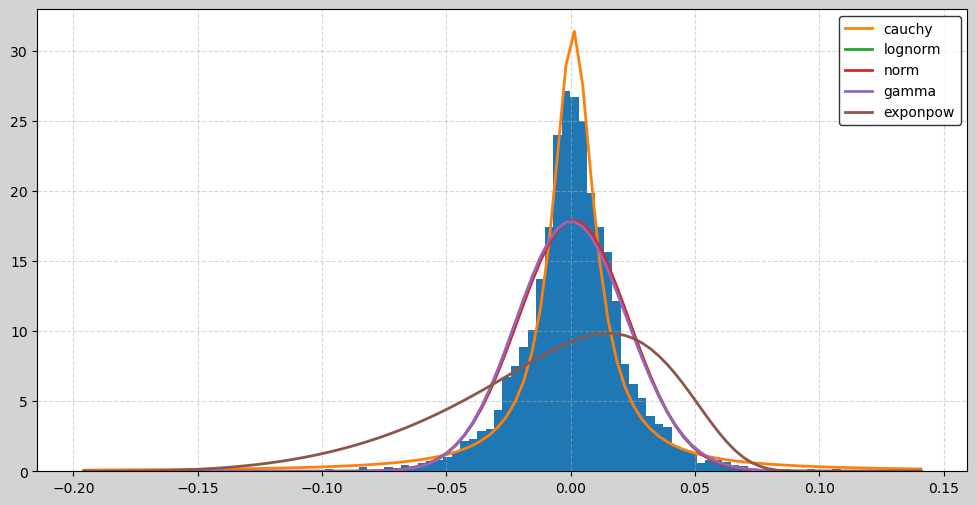

In [16]:
dist= get_common_distributions() #get_distributions()#get_common_distributions() 
f = Fitter(data.r,distributions=dist)
f.fit()
f.summary()
print ("r")
print(f.get_best())